# Black friday (Regression problem).

### Introduction:
In this kernel ,we are going to build Neural network model using keras and compare it with some Machine learning algorithms,
you will learn how and why we use early stopping in ML models and Deep learning

we have 550068-rows & 12-columns, and we need to predict Purchase depending on person Id and the product Id and some other 

* some important libraries :
    * **visualize** :
        - matplotlib
        - seaborn
        - missingno
    * **manipulate** :
        - pandas
        - numpy
    * **modeling** :
        - keras
        - tensorflow
    * **algorithms** :
        - XGBRegressor
        - DecisionTreeRegressor
        - GradientBoostingRegressor
        - KNeighborsRegressor
        - RandomForestRegressor
        - LinearSVR
    * **other** :
        - time
        - warnings
        - IPython



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use('bmh')

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU
import tensorflow as tf

import time
from IPython.display import Image


import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [2]:
train = pd.read_csv('datasets/keras BlackFriday/train.csv')
test = pd.read_csv('datasets/keras BlackFriday/test.csv')

**It will be better to combine the train and test data so we don't need to repeat the same process two time**
**we will make a new column (kind) and we will fill it with train & test to separate the data when we finish**

In [3]:
train['kind'] = 'train'
test['kind'] = 'test'
combine = pd.concat([train,test], axis=0)

In [4]:
train.shape, test.shape, combine.shape

((550068, 13), (233599, 12), (783667, 13))

In [5]:
print(combine.shape)
combine.head()

# you can see , we got some missing values in the data

(783667, 13)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,kind
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [6]:
combine.info()

# don't be afraid from the missing data in Purchase , they are from the test data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  kind                        783667 non-null  object 
dtypes: float64(3),

In [7]:
# change the columns to object type 

combine['Marital_Status'] = combine['Marital_Status'].astype('O')
combine['Occupation'] = combine['Occupation'].astype('O')
combine['Product_Category_1'] = combine['Product_Category_1'].astype('O')
combine['Product_Category_2'] = combine['Product_Category_2'].astype('O')
combine['Product_Category_3'] = combine['Product_Category_3'].astype('O')

In [8]:
combine.describe()

,User_ID,Purchase
count,7.836670e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727267e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001519e+06,5823.000000
50%,1.003075e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [9]:
combine.describe(include='O')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,kind
count,783667,783667,783667,783667,783667,783667,783667,783667,537685.0,237858.0,783667
unique,3677,2,7,21,3,5,2,20,17.0,15.0,2
top,P00265242,M,26-35,4,B,1,0,5,8.0,16.0,train
freq,2709,590031,313015,103086,329739,276425,462538,215950,91317.0,46469.0,550068


In [10]:
combine.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
kind                               0
dtype: int64

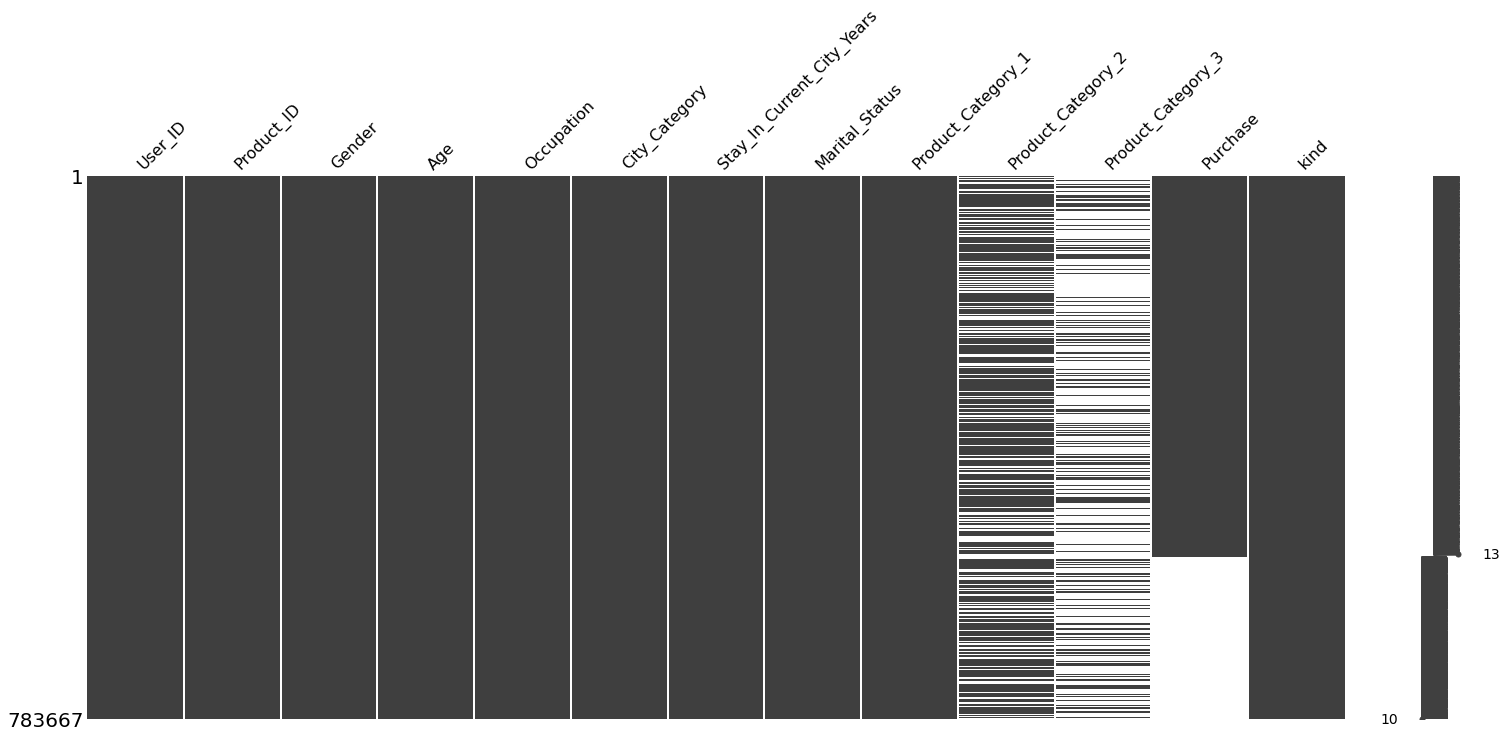

In [11]:
c

# ohhh, we got a lot of missing data in Product_Category_3

In [ ]:
target = 'Purchase'
cat_col = ['Age', 'City_Category', 'Gender', 'Marital_Status', 'Stay_In_Current_City_Years',
           'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

NameError: name 'cat_col' is not defined

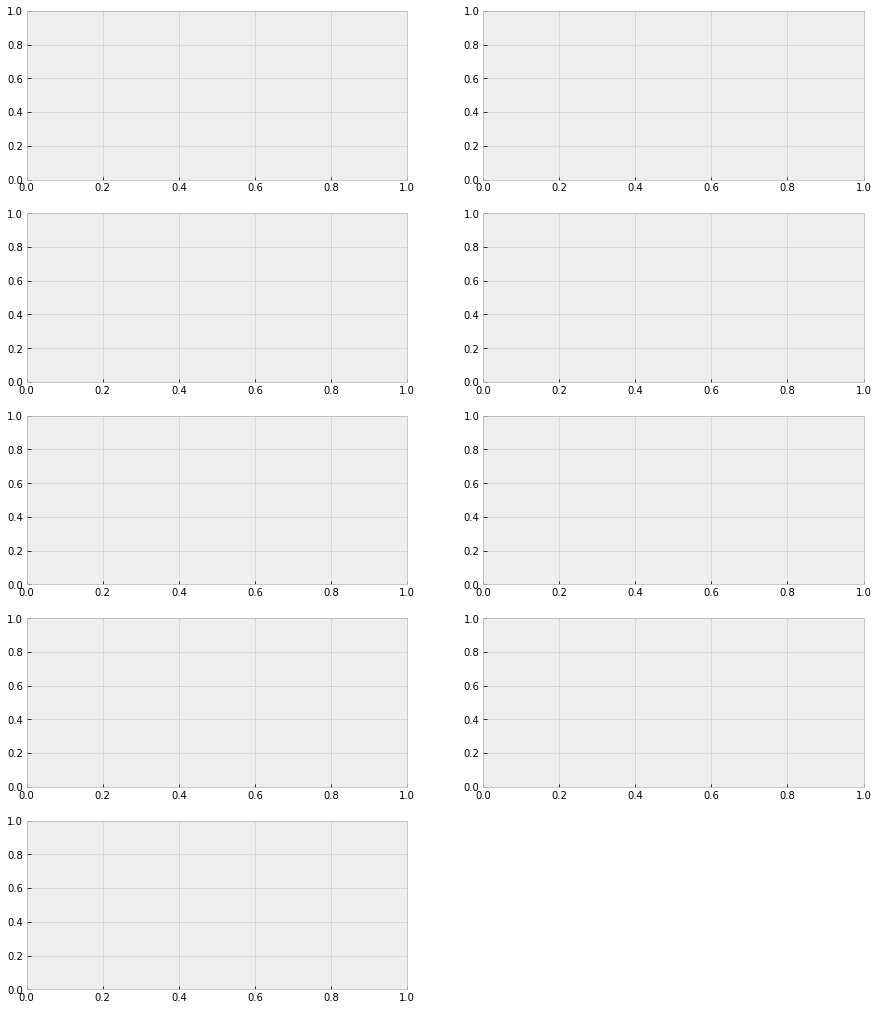

In [12]:
# let's try to see the relation between the labels and the target
# It will take some time

fig, ax = plt.subplots(5,2, figsize=(15,18))
ax.flat[-1].set_visible(False) # to remove last plot
for i,col in enumerate(cat_col):
    plt.subplot(5,2,i+1)
    sns.barplot(x=col, y=target, data=combine)
    plt.xlabel(col)
    plt.ylabel(target)

## In this kernel i will not focus on process the data (feature engineer), so we will not change anything in the data

## If you like to learn some feature engineer you can visit my [kernel](https://www.kaggle.com/yaheaal/loan-status-with-different-models)

In [ ]:
# visualize the count of every feature

fig, ax = plt.subplots(5,2, figsize=(15,18))
ax.flat[-1].set_visible(False) # to remove last plot
for i,col in enumerate(cat_col):
    plt.subplot(5,2,i+1)
    sns.countplot(x=col, data=combine)
    plt.xlabel(col)

# Missing data

In [ ]:
# here i will just add two columns to specify the row that got missing value, so 1 if the row is missing and 0 if not
# and i will use them as a features
combine['miss_1'] = [1 if x!=x else 0 for x in combine['Product_Category_3']]
combine['miss_2'] = [1 if x!=x else 0 for x in combine['Product_Category_2']]

# fill the missing data
combine['Product_Category_3'].fillna(method='bfill', inplace=True)
combine['Product_Category_2'].fillna(method='bfill', inplace=True)
combine.dropna(subset=['Product_Category_3'],inplace=True)

# handle categorical features

In [ ]:
age_cat = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
combine['Age'] = combine['Age'].map(age_cat)

city_cat = pd.get_dummies(combine['City_Category'], drop_first=True, prefix='City_Category')
combine = pd.concat([combine, city_cat], axis=1)
combine.drop('City_Category', axis=1, inplace=True)

gender_cat = {'M':0, 'F':1}
combine['Gender'] = combine['Gender'].map(gender_cat)

stay_cat = pd.get_dummies(combine['Stay_In_Current_City_Years'], drop_first=True, prefix='Stay_In_Current_City_Years')
combine = pd.concat([combine, stay_cat], axis=1)
combine.drop('Stay_In_Current_City_Years', axis=1, inplace=True)

In [ ]:
combine

In [ ]:
# separate the data

train = combine[combine['kind'] == 'train']
test = combine[combine['kind'] == 'test']

train.drop(['kind'], axis=1, inplace=True)
test.drop(['kind','Purchase'], axis=1, inplace=True)

In [ ]:
train.head()

In [ ]:
test.head()

# build the function

In [ ]:
ID_col = ['Product_ID','User_ID']
target = ['Purchase']
features = train.columns.drop(ID_col+target)

def train_eval(model, features, target, cv):
    X = train[features].values
    y = train[target]
    
    # i will just calculate the time needed to fit the model one time
    time0 = time.time()
    model.fit(X, y)
    time1 = time.time()
    
    mse = mean_squared_error(y, model.predict(X))
    rmse = np.sqrt(mse)
    
    cross_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    cross_rmse = np.sqrt(np.absolute(cross_mse))
    mean = np.mean(cross_rmse)
    max_ = np.max(cross_rmse)
    min_ = np.min(cross_rmse)
    std = np.std(cross_rmse)
    
    print('RMSE : %.4g' % rmse)
    print('cv_%.1g : RMSE - %.4g | std - %.4g | max - %.4g | min - %.4g' % (cv,mean, std, max_, min_))
    print('Time complexity: {} sec'.format(round((time1-time0),2)))

### SVR

In [ ]:
svr = LinearSVR(random_state=42)
train_eval(svr, features, target, 5)

### RandomForest

In [ ]:
rf = RandomForestRegressor(max_depth=15, min_samples_leaf=100, n_jobs=-1, random_state=42)
train_eval(rf, features, target, 5)

### Neighbors

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
train_eval(knn, features, target, 5)

### Boosting

In [ ]:
boost = GradientBoostingRegressor(max_depth=3, min_samples_leaf=100, n_estimators=50, random_state=42)
train_eval(boost, features, target, 3)

### DecisiongTree

In [ ]:
tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100, random_state=42)
train_eval(tree, features, target, 5)

### XGBoost

In [ ]:
model = XGBRegressor(n_estimators=50, max_depth=15, random_state=42, objective='reg:squarederror', n_jobs=-1)
train_eval(model, features, target, 5)

**I choose to go with XGBoost**

# hyperparameter tuning

In [ ]:
model = XGBRegressor(n_estimators=50, random_state=42, objective='reg:squarederror', verbose=3, n_jobs=-1)

param = {'learning_rate' : np.random.uniform(0.1, 0.4, 50),
         'gamma' : np.random.uniform(0.3, 0.6, 50),
         'max_depth' : np.random.randint(5, 20, 10),
         'min_child_weight' : np.random.randint(1, 7, 10),
         'subsample' : [0.7, 0.8, 0.9, 1.0],
         'tree_method' : ['approx', 'gpu_hist']}

rnd = RandomizedSearchCV(model, param, n_iter=50,scoring='neg_mean_squared_error', cv=3, verbose=3)

In [ ]:
# it will take alot of time so i will just give you the result

#%%time
#rnd.fit(X_train, y_train)

In [ ]:
'''
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3026809093085653,
             importance_type='gain', learning_rate=0.22998204097725214,
             max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
             n_estimators=50, n_jobs=-1, nthread=None,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.8, tree_method='approx', verbose=3, verbosity=1)
'''

## why we use early stopping

**Get the best loss on the test data :**
as you can see in the photo below, the training error keeps reducing as we keep iterating ,while at a specific point
the test error start to increase so we want to find the best number of iterations that give us the best error

**Avoid the overfitting :**
if we keep iterating we will start to overfitting the data where the model will preforme good on the training data but bad
on the test

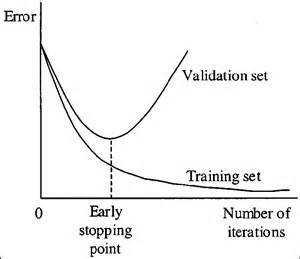

In [ ]:
X = train[features].values
y = train[target].values
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.1, random_state=42)

n_estimators = 1000

model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3026809093085653,
             importance_type='gain', learning_rate=0.22998204097725214,
             max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
             n_estimators=n_estimators, n_jobs=-1, nthread=None,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.8, tree_method='gpu_hist', verbose=3, verbosity=1)

In [ ]:
model.fit(X_train, y_train, eval_set=[[X_eval, y_eval]], eval_metric=['rmse'], early_stopping_rounds=30, verbose=3)

In [ ]:
n_estimators = 52  # it may be different number for you

final_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3026809093085653,
             importance_type='gain', learning_rate=0.22998204097725214,
             max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
             n_estimators=n_estimators, n_jobs=-1, nthread=None,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.8, tree_method='gpu_hist', verbose=3, verbosity=1)

In [ ]:
final_model.fit(X_train, y_train, verbose=3)
pred = final_model.predict(X_eval)
print(np.sqrt(mean_squared_error(y_eval, pred)))

**nice , we get rmse = 2880, so know let's try deep learning models**

**Hint, i didn't predict the test data, so i will keep that as a homework for you**

# Deep learning

In [ ]:
# first we need to scale the data

MMS = MinMaxScaler()

X_train_scale = MMS.fit_transform(X_train)
X_eval_scale = MMS.transform(X_eval)

In [ ]:
# we will make 3 loops for number of layers , neurons and batch_size
# so first loop will content n_layers=1, n_neurons=32, batch_size=16
# second one will be 1,32,32 then 1,32,64 and so on....
# last loop will be 4,265,128
# we will save every loss in a list to visualize all the losses together

n_layers = [1,2,3,4]
n_neurons = [32, 64, 128, 256]
batch_size= [16, 32, 64, 128]
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# If true , will take so much time so i will give you the result below
search = False

if search:
    loss = []
    txt = []
    for layer in n_layers:
        for neuron in n_neurons:
            for batch in batch_size:
                name = 'layers-{} | neruons-{} | batchs-{}'.format(layer, neuron, batch)
                print('\n')
                print('='*125)
                print(name,'\n')

                model = Sequential()
                model.add(Dense(neuron, kernel_initializer="he_normal", input_dim=15))
                model.add(LeakyReLU(alpha=0.1))
                model.add(BatchNormalization())  

                for l in range(layer - 1): # -1 because we build one before the for loop
                    model.add(Dense(neuron, kernel_initializer="he_normal"))
                    model.add(LeakyReLU(alpha=0.1)),
                    model.add(BatchNormalization()),
                model.add(Dense(1, kernel_initializer="he_normal"))

                model.compile(optimizer='adam', loss='mean_squared_error')
                history = model.fit(X_train_scale, y_train, batch_size=batch, epochs=1000, validation_split=0.1, callbacks=[early_stopping_cb])

                loss.append(np.sqrt(history.history['val_loss'][-6])) # -6 because patience in earlystopping is 5 so the best loss will be number 6 from the end
                txt.append((layer, neuron, batch))
                
else:
    loss = [4538.162773310764, 4528.919546972363, 4555.206869875014, 4561.817443199395, 4558.771822474467, 4557.159006431591, 
        4605.243145800776, 4580.730821199933, 4550.426779886288, 4600.969973321105, 4514.815304732046, 4590.007836975674, 
        4697.22794764056, 4611.343550835154, 4562.681806878502, 4627.150532965219, 4084.99564872551, 3176.5464741258747, 
        2971.45652539503, 3161.776962105597, 3431.6057047023446, 3409.0539069052274, 3404.063835529596, 3017.743664052202, 
        3362.4215380931564, 3435.136638901797, 3010.438233249307, 2954.5457607921167, 3514.0812406716905, 3025.4181226816495, 
        3623.275705812271, 3105.316447277697, 3411.2868990944658, 3201.5642396290564, 3030.843532987632, 3471.2225649325574, 
        3085.508463558903, 2970.8279084851756, 3006.955357134481, 2947.6093123558067, 3023.803862751194, 2967.196445916267, 
        3041.0858906564627, 3024.843955508851, 3593.8802212212427, 3508.910344462979, 3242.077742120429, 2943.1258859942195, 
        3075.5810428356244, 2972.1642022285787, 2979.3162717056316, 2936.2644732625654, 3038.3183314715366, 3013.34612037504, 
        2985.3935757584327, 2922.5277112184617, 3113.683920719498, 2912.986334504327, 2959.154126819401, 2919.3430413121396, 
        3362.828334393951, 2950.6100355806257, 2935.4806295933245, 3131.7943371843767]

    txt = [(1, 32, 16), (1, 32, 32), (1, 32, 64), (1, 32, 128), (1, 64, 16), (1, 64, 32), (1, 64, 64), (1, 64, 128), (1, 128, 16),
           (1, 128, 32), (1, 128, 64), (1, 128, 128), (1, 256, 16), (1, 256, 32), (1, 256, 64), (1, 256, 128), (2, 32, 16),
           (2, 32, 32), (2, 32, 64), (2, 32, 128), (2, 64, 16), (2, 64, 32), (2, 64, 64), (2, 64, 128), (2, 128, 16), (2, 128, 32),
           (2, 128, 64), (2, 128, 128), (2, 256, 16), (2, 256, 32), (2, 256, 64), (2, 256, 128), (3, 32, 16), (3, 32, 32),
           (3, 32, 64), (3, 32, 128), (3, 64, 16), (3, 64, 32), (3, 64, 64), (3, 64, 128), (3, 128, 16), (3, 128, 32), (3, 128, 64),
           (3, 128, 128), (3, 256, 16), (3, 256, 32), (3, 256, 64), (3, 256, 128), (4, 32, 16), (4, 32, 32), (4, 32, 64),
           (4, 32, 128), (4, 64, 16), (4, 64, 32), (4, 64, 64), (4, 64, 128), (4, 128, 16), (4, 128, 32), (4, 128, 64),
           (4, 128, 128), (4, 256, 16), (4, 256, 32), (4, 256, 64), (4, 256, 128)]

In [ ]:
# let's take a better look on the probabilities to know what should we choose 

x_axis = np.arange(1,len(loss)+1)
y_axis = loss

fig, ax = plt.subplots(figsize=(30,10))
plt.plot(x_axis, y_axis, '-o')

for i, (x_axis,y_axis) in enumerate(zip(x_axis,y_axis)):
    plt.text(x_axis,y_axis+20,txt[i])
    
print('minimum loss :', min(loss))
print('values :', txt[np.argmin(loss)])

# so know you can choose the value that gives you the minimum loss

**the loss decrease when we increase the number of layers ,but it's not a rule , for example: (2, 32, 64) got lower loss than (3,256,16)**

**Conclusion:**

We figure out that using machine learning techniques **in this data** giving us better results, Although we didn't do any change on the feature we was able to get good results
